In [27]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [31]:
model_option = {
    "nnsk": {
        "onsite": {"method": "none"},
        "hopping": {"method": "powerlaw", "rs":1.6, "w": 0.3},
        "soc":{},
        "push": False,
        "freeze": False
    }
}
common_options = {
"basis": {
    "C": ["2s"]
},
"device": "cpu",
"dtype": "float32",
"overlap": False
}

# Build the model
model = build_model("./nnsk.json", model_option, common_options)


The model option std in nnsk is not defined in input model_options, set to 0.01.


In [34]:

jdata = j_loader("./band_plot.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./C_chain18.vasp"
AtomicData_options = {"r_max": 5.0, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path=None, 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
#bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
#               E_fermi = kpath_kwargs["E_fermi"],
#               emin = kpath_kwargs["emin"],
#               emax = kpath_kwargs["emax"])

1

1

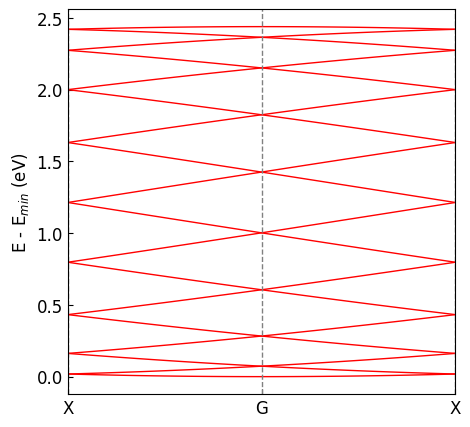

In [35]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(eigenstatus['xlist'], eigenstatus['eigenvalues']- np.min(eigenstatus['eigenvalues']), 'r-',lw=1)

#plt.ylim(-1,35)
for ii in eigenstatus['high_sym_kpoints']:
    plt.axvline(ii,color='gray',lw=1,ls='--')
plt.tick_params(direction='in')

plt.xlim(eigenstatus['xlist'].min(),eigenstatus['xlist'].max())

plt.ylabel('E - E$_{min}$ (eV)',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(eigenstatus['high_sym_kpoints'], eigenstatus['labels'], fontsize=12)
plt.show()